In [ ]:
!pip install -q keras

In [ ]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights='imagenet', include_top=True)

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

def predict(model, img_path, target_size=(299, 299), top_n=5):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=top_n)[0]

In [ ]:
import matplotlib.pyplot as plt

def plot_image(img_path):
    img = image.load_img(fn, target_size=(299, 299))
    plt.figure(figsize=(8, 8))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    
def plot_pred(pred):
    plt.figure(figsize=(8, 2))
    classes = [c[1] for c in pred]
    probas = [c[2] for c in pred]
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probas, align='center')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.xlim(0, 1)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "car.jpg" with length 1,053,986 bytes'.format(
      name=fn,length=len(uploaded[fn])))

Saving car.jpg to car.jpg
User uploaded file "gato.jpg" with length 94,560 bytes


40960/35363 [==================================] - 0s 0us/step


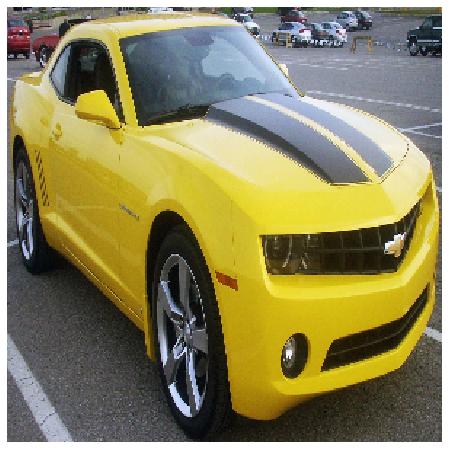

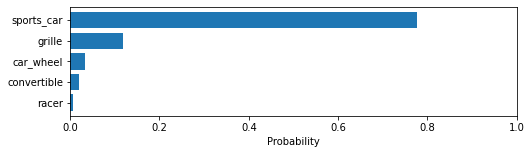

In [ ]:
pred = predict(model,fn)
plot_image(fn)
plot_pred(pred)